In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('datasets/Salary_Data.csv')

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


##### Cross validation Techniques

In [4]:
#  y- test is result known and y-predict the result of algo, the difference we are having called accuracy of the algo.
# Regression, error to find the accuracy of the model. 
# Holdout Method, we have to find the accuracy of the algo. It is used to evaluate the method, used in Supervised algo, it is data validation

##### Seperate the input and output variables

In [15]:
x= df[['YearsExperience']]# it is two dimensional array
y=df['Salary']


In [10]:
x.shape

(30, 1)

In [11]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [13]:
# Highly correlated to each other , it is linearly connected to each other

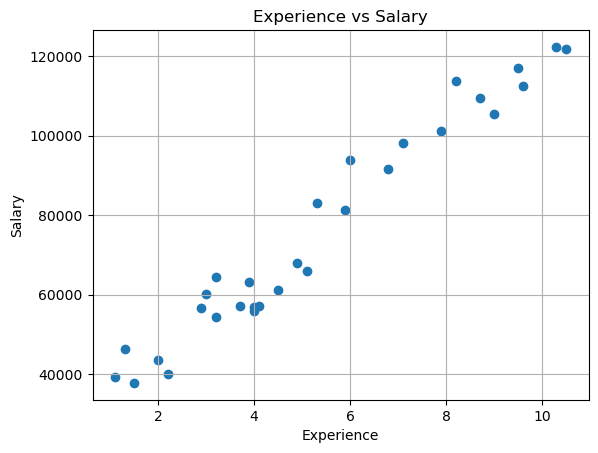

In [14]:
# plot the data
plt.grid()
plt.title('Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y)

##### Cross Validation

In [24]:
# import the fucntion 
from sklearn.model_selection import train_test_split

In [32]:
#split the data in training 75% and testing 25%
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0)

In [57]:
x_train

,YearsExperience
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8
1,1.3
29,10.5


In [58]:
x_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7
27,9.6
11,4.0


##### Build the model

In [27]:
from sklearn.linear_model import LinearRegression

In [30]:
regressor=LinearRegression()

In [31]:
regressor.fit(x_train,y_train)

LinearRegression()

In [36]:
regressor.coef_,regressor.intercept_

(array([9379.71049195]), 26986.691316737248)

In [39]:
regressor.predict([[12]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139543.21722009])

In [40]:
x_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7
27,9.6
11,4.0


In [42]:
#Predict on the test data

In [43]:
y_pred=regressor.predict(x_test)

In [44]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [45]:
# find difference between y_pred and y_test

In [46]:
result=pd.DataFrame({
    'actual':y_test,
    'predict':y_pred
})

In [47]:
result

,actual,predict
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


##### Mean Absolute Error


In [52]:
result=pd.DataFrame({
   'x':x_test['YearsExperience'],
    'y':y_test,
    'y^':y_pred,
    'Error':y_pred-y_test,
    'abs(Error)':abs(y_pred - y_test)
})

In [53]:
result

,x,y,y^,Error,abs(Error)
2,1.5,37731.0,41056.257055,3325.257055,3325.257055
28,10.3,122391.0,123597.709384,1206.709384,1206.709384
13,4.1,57081.0,65443.504334,8362.504334,8362.504334
10,3.9,63218.0,63567.562235,349.562235,349.562235
26,9.5,116969.0,116093.940990,-875.059010,875.059010
24,8.7,109431.0,108590.172597,-840.827403,840.827403
27,9.6,112635.0,117031.912039,4396.912039,4396.912039
11,4.0,55794.0,64505.533285,8711.533285,8711.533285


In [54]:
# mean absolute error
np.mean(abs(y_pred-y_test))

3508.5455930660555

In [56]:
# find this mean with predefine function
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3508.5455930660555

##### Root Mean Square Error

In [ ]:
# taking the square root of the averge of the squared difference sum(y-y^)**2/n

In [60]:
result=pd.DataFrame({
   'x':x_test['YearsExperience'],
    'y':y_test,
    'y^':y_pred,
    'Error':y_pred-y_test,
    'abs(Error)':(y_pred - y_test)**2
})

In [61]:
result

,x,y,y^,Error,abs(Error)
2,1.5,37731.0,41056.257055,3325.257055,1.105733e+07
28,10.3,122391.0,123597.709384,1206.709384,1.456148e+06
13,4.1,57081.0,65443.504334,8362.504334,6.993148e+07
10,3.9,63218.0,63567.562235,349.562235,1.221938e+05
26,9.5,116969.0,116093.940990,-875.059010,7.657283e+05
24,8.7,109431.0,108590.172597,-840.827403,7.069907e+05
27,9.6,112635.0,117031.912039,4396.912039,1.933284e+07
11,4.0,55794.0,64505.533285,8711.533285,7.589081e+07


In [62]:
#RMSE
np.sqrt(np.mean((y_pred-y_test)**2))

4733.70258289858

In [ ]:
from sklearn.metrics import mean_squared_error
np.sort(mean_squared_error(y_test, y_pred))

In [66]:
#MAE VS RMSE
# if test and pred both are same then both MAE AND RMSE both will be 0
# r^2 error: r^2=SSR/SST=SUM(Yi-y-)^2/(yi), variance of mean and variance of line ,

##### R squared error, to finding out percentage of accuracy 

In [67]:
mean_val=np.mean(y_test)

In [68]:
mean_val

84406.25

In [71]:
num=np.sum((y_test-mean_val)**2)-np.sum((y_test-y_pred)**2)
r2=num/np.sum((y_test-mean_val)**2)
r2

0.9779208335417601

In [72]:
# using formula
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9779208335417602

In [73]:
# using another function
regressor.score(x_test,y_test)

0.9779208335417602

In [76]:
regressor.score(x_train,y_train)

0.9395413526983522

In [77]:
# prediction on the old data
y_pred=regressor.predict(x)

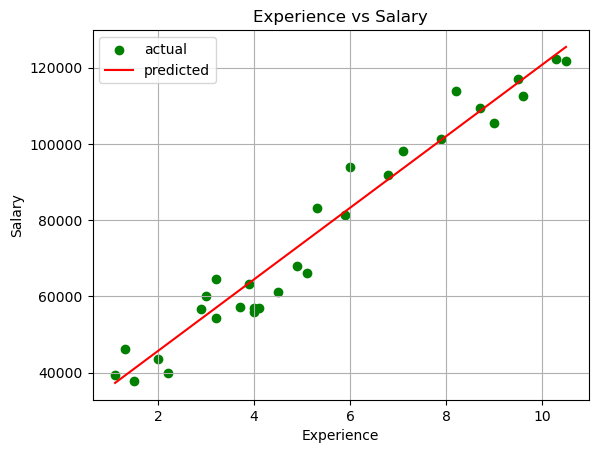

In [83]:
# plot the data
plt.grid()
plt.title('Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y,color='green',label='actual')
plt.plot(x,y_pred,color='red',label='predicted')
plt.legend()

In [84]:
regressor.score(x,y)

0.955975487542377

In [86]:
y_pred=regressor.predict(x_test) 
from sklearn.metrics import mean_absolute_percentage_error   # percentage difference between actual y_test and predicted result y_pred
mean_absolute_percentage_error(y_test,y_pred)

0.05754512646779697

In [89]:
exp=float(input('Enter the experienced '))
exp=pd.DataFrame({'YearsExperience': [exp]})
sal=regressor.predict(exp)
print('Your expected salary can be: ',sal[0])

Enter the experienced  40


Your expected salary can be:  402175.11099457793
